In [1]:
# Import Module
import pandas as pd
import numpy as np
import missingno as msno
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import nltk
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
from gensim.models import Word2Vec, FastText
import nltk.stem as stemmer

In [2]:
# Path file
path="C:\\Users\\Hasan Zein\\ESSAI OLS\\scrapped_data_google play_labeled.xlsx"

In [3]:
# Open File
data = pd.read_excel(path)

In [4]:
# Check File
data

,userName,score,at,content,Label
0,Achmad Faisal,1,2022-08-14 12:09:13,Sudah vaksin tapi sertifikat belom keluar suda...,0.0
1,Stineke Mare,2,2022-08-14 11:26:51,Min kok ngak bisa ke buka sertifika nya,0.0
2,AHMAD YANI,2,2022-08-14 10:35:37,Terlalu rumit sungguh kecewa Udah di masukin d...,0.0
3,Hendrik Timisela,5,2022-08-14 10:34:40,Aplikasi ini sangat bermanfaat.....,1.0
4,Heni Susanti,5,2022-08-14 10:21:21,Ok bgt,1.0
...,...,...,...,...,...
2495,Sarah Oasis,1,2022-07-26 14:09:16,susah dan sangat sangat sangat merepotkan. mau...,0.0
2496,Edy sudrajat,5,2022-07-26 14:02:47,Jos,1.0
2497,diah agus tiyani,1,2022-07-26 14:00:07,Sudah vaksin ke 3 tp di app tidak mincul serti...,0.0
2498,Oscar Imanuel,5,2022-07-26 13:57:11,Apknya bagus bangettt,1.0


# Delete data tidak sesuai

In [5]:
# Check Missing Value
data.isnull().sum()

userName      0
score         0
at            0
content       0
Label       225
dtype: int64

<AxesSubplot:>

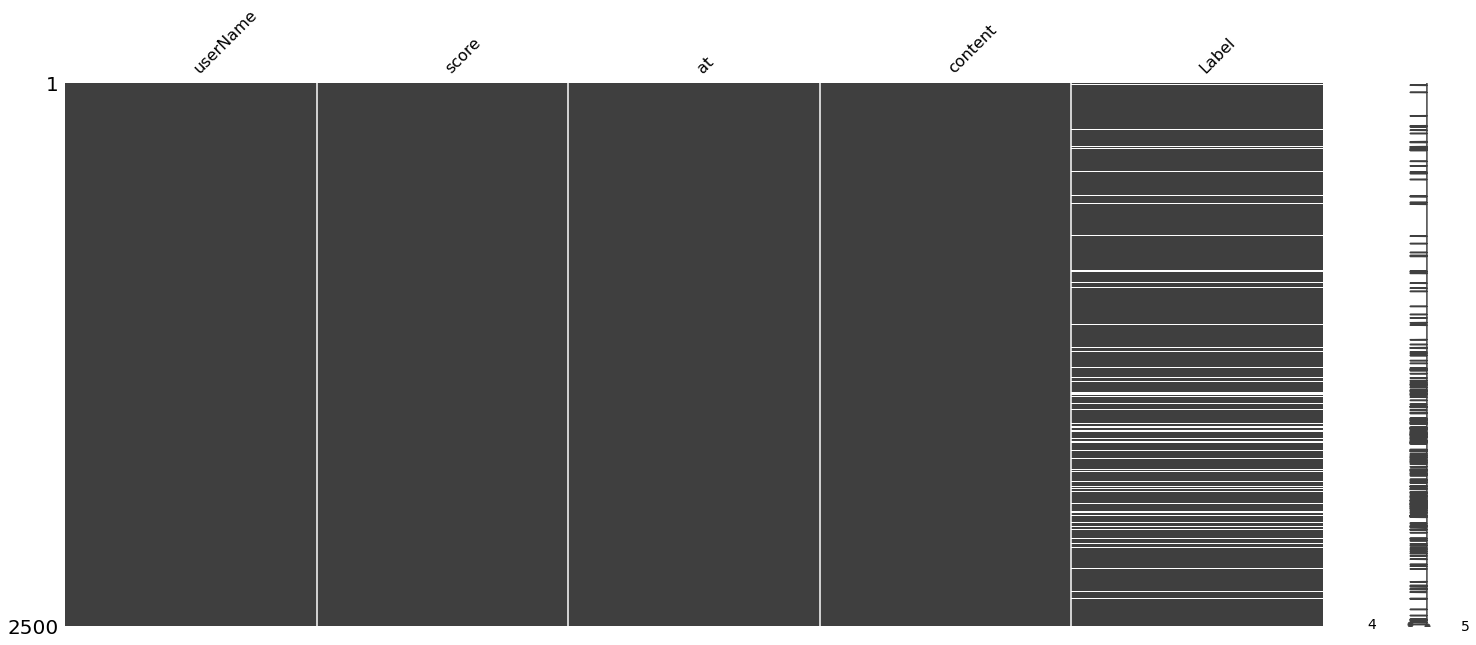

In [6]:
# Check missing value using msno matrix
msno.matrix(data)

In [7]:
# Drop Missing Value
df = data.dropna()

<AxesSubplot:>

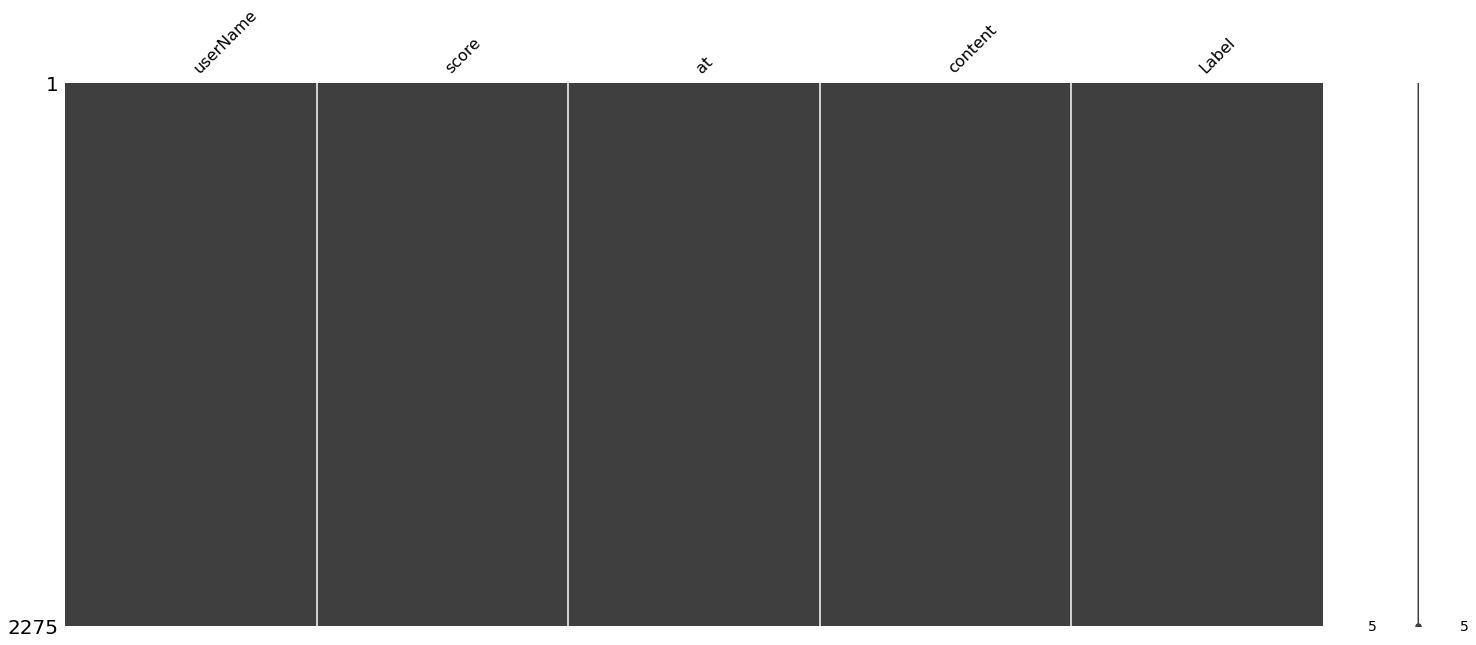

In [8]:
# Check result
msno.matrix(df)

# Cleaning text

In [9]:
# Cleaning text function
def remove_punct(text) :
    text = re.sub(r'[^a-zA-Z0-9]'," ",str(text))
    text = re.sub(r'\b\w(1,2)\b',"",text)
    text = re.sub(r"\s\s+"," ",text)
    text = re.sub("\d+", "", text)
    text = text.lower()
    text = text.strip(" ")
    return text

In [10]:
# Apply the function
df["hasil"] = df["content"].apply(lambda x: remove_punct(x))

C:\Users\Hasan Zein\AppData\Local\Temp\ipykernel_5088\1255215177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hasil"] = df["content"].apply(lambda x: remove_punct(x))


In [11]:
# Check the result
df

,userName,score,at,content,Label,hasil
0,Achmad Faisal,1,2022-08-14 12:09:13,Sudah vaksin tapi sertifikat belom keluar suda...,0.0,sudah vaksin tapi sertifikat belom keluar suda...
1,Stineke Mare,2,2022-08-14 11:26:51,Min kok ngak bisa ke buka sertifika nya,0.0,min kok ngak bisa ke buka sertifika nya
2,AHMAD YANI,2,2022-08-14 10:35:37,Terlalu rumit sungguh kecewa Udah di masukin d...,0.0,terlalu rumit sungguh kecewa udah di masukin d...
3,Hendrik Timisela,5,2022-08-14 10:34:40,Aplikasi ini sangat bermanfaat.....,1.0,aplikasi ini sangat bermanfaat
4,Heni Susanti,5,2022-08-14 10:21:21,Ok bgt,1.0,ok bgt
...,...,...,...,...,...,...
2495,Sarah Oasis,1,2022-07-26 14:09:16,susah dan sangat sangat sangat merepotkan. mau...,0.0,susah dan sangat sangat sangat merepotkan mau ...
2496,Edy sudrajat,5,2022-07-26 14:02:47,Jos,1.0,jos
2497,diah agus tiyani,1,2022-07-26 14:00:07,Sudah vaksin ke 3 tp di app tidak mincul serti...,0.0,sudah vaksin ke tp di app tidak mincul sertiv...
2498,Oscar Imanuel,5,2022-07-26 13:57:11,Apknya bagus bangettt,1.0,apknya bagus bangettt


# Tokenizing

In [12]:
# Tokenizing 
df['tokenize_hasil'] = df.apply(lambda row: nltk.word_tokenize(row['hasil']), axis=1)

C:\Users\Hasan Zein\AppData\Local\Temp\ipykernel_5088\1930525006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenize_hasil'] = df.apply(lambda row: nltk.word_tokenize(row['hasil']), axis=1)


In [13]:
# Check result
df

,userName,score,at,content,Label,hasil,tokenize_hasil
0,Achmad Faisal,1,2022-08-14 12:09:13,Sudah vaksin tapi sertifikat belom keluar suda...,0.0,sudah vaksin tapi sertifikat belom keluar suda...,"[sudah, vaksin, tapi, sertifikat, belom, kelua..."
1,Stineke Mare,2,2022-08-14 11:26:51,Min kok ngak bisa ke buka sertifika nya,0.0,min kok ngak bisa ke buka sertifika nya,"[min, kok, ngak, bisa, ke, buka, sertifika, nya]"
2,AHMAD YANI,2,2022-08-14 10:35:37,Terlalu rumit sungguh kecewa Udah di masukin d...,0.0,terlalu rumit sungguh kecewa udah di masukin d...,"[terlalu, rumit, sungguh, kecewa, udah, di, ma..."
3,Hendrik Timisela,5,2022-08-14 10:34:40,Aplikasi ini sangat bermanfaat.....,1.0,aplikasi ini sangat bermanfaat,"[aplikasi, ini, sangat, bermanfaat]"
4,Heni Susanti,5,2022-08-14 10:21:21,Ok bgt,1.0,ok bgt,"[ok, bgt]"
...,...,...,...,...,...,...,...
2495,Sarah Oasis,1,2022-07-26 14:09:16,susah dan sangat sangat sangat merepotkan. mau...,0.0,susah dan sangat sangat sangat merepotkan mau ...,"[susah, dan, sangat, sangat, sangat, merepotka..."
2496,Edy sudrajat,5,2022-07-26 14:02:47,Jos,1.0,jos,[jos]
2497,diah agus tiyani,1,2022-07-26 14:00:07,Sudah vaksin ke 3 tp di app tidak mincul serti...,0.0,sudah vaksin ke tp di app tidak mincul sertiv...,"[sudah, vaksin, ke, tp, di, app, tidak, mincul..."
2498,Oscar Imanuel,5,2022-07-26 13:57:11,Apknya bagus bangettt,1.0,apknya bagus bangettt,"[apknya, bagus, bangettt]"


# Stopword Removal

In [14]:
# Define Indonesia stopword
stopword = stopwords.words('indonesian')

In [15]:
# Stopword removal function
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

In [16]:
# Apply the fuction
df["STOP_REMOVAL"]=df["tokenize_hasil"].apply(lambda x: remove_stopwords(x))

C:\Users\Hasan Zein\AppData\Local\Temp\ipykernel_5088\817013741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["STOP_REMOVAL"]=df["tokenize_hasil"].apply(lambda x: remove_stopwords(x))


In [17]:
# Check result
df

,userName,score,at,content,Label,hasil,tokenize_hasil,STOP_REMOVAL
0,Achmad Faisal,1,2022-08-14 12:09:13,Sudah vaksin tapi sertifikat belom keluar suda...,0.0,sudah vaksin tapi sertifikat belom keluar suda...,"[sudah, vaksin, tapi, sertifikat, belom, kelua...","[vaksin, sertifikat, belom, komplen, kemana, g..."
1,Stineke Mare,2,2022-08-14 11:26:51,Min kok ngak bisa ke buka sertifika nya,0.0,min kok ngak bisa ke buka sertifika nya,"[min, kok, ngak, bisa, ke, buka, sertifika, nya]","[min, ngak, buka, sertifika, nya]"
2,AHMAD YANI,2,2022-08-14 10:35:37,Terlalu rumit sungguh kecewa Udah di masukin d...,0.0,terlalu rumit sungguh kecewa udah di masukin d...,"[terlalu, rumit, sungguh, kecewa, udah, di, ma...","[rumit, sungguh, kecewa, udah, masukin, data, ..."
3,Hendrik Timisela,5,2022-08-14 10:34:40,Aplikasi ini sangat bermanfaat.....,1.0,aplikasi ini sangat bermanfaat,"[aplikasi, ini, sangat, bermanfaat]","[aplikasi, bermanfaat]"
4,Heni Susanti,5,2022-08-14 10:21:21,Ok bgt,1.0,ok bgt,"[ok, bgt]","[ok, bgt]"
...,...,...,...,...,...,...,...,...
2495,Sarah Oasis,1,2022-07-26 14:09:16,susah dan sangat sangat sangat merepotkan. mau...,0.0,susah dan sangat sangat sangat merepotkan mau ...,"[susah, dan, sangat, sangat, sangat, merepotka...","[susah, merepotkan, buka, sertifikat, aja, bol..."
2496,Edy sudrajat,5,2022-07-26 14:02:47,Jos,1.0,jos,[jos],[jos]
2497,diah agus tiyani,1,2022-07-26 14:00:07,Sudah vaksin ke 3 tp di app tidak mincul serti...,0.0,sudah vaksin ke tp di app tidak mincul sertiv...,"[sudah, vaksin, ke, tp, di, app, tidak, mincul...","[vaksin, tp, app, mincul, sertivikatnya, ga, i..."
2498,Oscar Imanuel,5,2022-07-26 13:57:11,Apknya bagus bangettt,1.0,apknya bagus bangettt,"[apknya, bagus, bangettt]","[apknya, bagus, bangettt]"


# Stemming

In [18]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [19]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [20]:
# stemmed 
def stemming(review):
    do = []
    for w in review:
        dt=stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean
df["clean"]=df["STOP_REMOVAL"].apply(stemming)

vaksin sertifikat bom komplen mana gak tanggap sekali wa bot
min ngak buka sertifika nya
rumit sungguh kecewa udah masukin data lengkap ih mintak lgi sungguh kecewa pribadi
aplikasi manfaat
ok bgt
udah vaksin date not match sampe skrng gabisa vaksin respon lwt email chatbot
mantap
bagus
ribeeettttt
aplikasi kini bantu era digital
sertifikat ga buka
moga lancar
mantap
aplikasi kaga udah lengkapin profil akun lengkapin nik eh tulis internal server eror melulu males deh mending uninstall aja
bagus
ok
mohon bantu vaksinasi terang aplikasi daftar
susah download sertifikat
sdh vaksin booster tgl agustus tp sertifikat blm muncul pdhl sy tgl agustus brngkt kerja lg k klmntn yg syarat hrs sdh v trimakasih
bagus
aplikasi nya scan barcode peduli lindung nya udah check in profil udah vaksin gabisa scan tolong min
aplikasi g buffering mulu
manfaat aplikasi
good
klik menu blank coba ni app
mudah praktis
kartu vaksinasi covid
patuh prokes mana
bagus
lot
stiap kali buka aplikasi suruh baru trs
bagus
b

C:\Users\Hasan Zein\AppData\Local\Temp\ipykernel_5088\682961407.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean"]=df["STOP_REMOVAL"].apply(stemming)


# Check hasil

In [21]:
df

,userName,score,at,content,Label,hasil,tokenize_hasil,STOP_REMOVAL,clean
0,Achmad Faisal,1,2022-08-14 12:09:13,Sudah vaksin tapi sertifikat belom keluar suda...,0.0,sudah vaksin tapi sertifikat belom keluar suda...,"[sudah, vaksin, tapi, sertifikat, belom, kelua...","[vaksin, sertifikat, belom, komplen, kemana, g...",vaksin sertifikat bom komplen mana gak tanggap...
1,Stineke Mare,2,2022-08-14 11:26:51,Min kok ngak bisa ke buka sertifika nya,0.0,min kok ngak bisa ke buka sertifika nya,"[min, kok, ngak, bisa, ke, buka, sertifika, nya]","[min, ngak, buka, sertifika, nya]",min ngak buka sertifika nya
2,AHMAD YANI,2,2022-08-14 10:35:37,Terlalu rumit sungguh kecewa Udah di masukin d...,0.0,terlalu rumit sungguh kecewa udah di masukin d...,"[terlalu, rumit, sungguh, kecewa, udah, di, ma...","[rumit, sungguh, kecewa, udah, masukin, data, ...",rumit sungguh kecewa udah masukin data lengkap...
3,Hendrik Timisela,5,2022-08-14 10:34:40,Aplikasi ini sangat bermanfaat.....,1.0,aplikasi ini sangat bermanfaat,"[aplikasi, ini, sangat, bermanfaat]","[aplikasi, bermanfaat]",aplikasi manfaat
4,Heni Susanti,5,2022-08-14 10:21:21,Ok bgt,1.0,ok bgt,"[ok, bgt]","[ok, bgt]",ok bgt
...,...,...,...,...,...,...,...,...,...
2495,Sarah Oasis,1,2022-07-26 14:09:16,susah dan sangat sangat sangat merepotkan. mau...,0.0,susah dan sangat sangat sangat merepotkan mau ...,"[susah, dan, sangat, sangat, sangat, merepotka...","[susah, merepotkan, buka, sertifikat, aja, bol...",susah repot buka sertifikat aja bolak ga
2496,Edy sudrajat,5,2022-07-26 14:02:47,Jos,1.0,jos,[jos],[jos],jos
2497,diah agus tiyani,1,2022-07-26 14:00:07,Sudah vaksin ke 3 tp di app tidak mincul serti...,0.0,sudah vaksin ke tp di app tidak mincul sertiv...,"[sudah, vaksin, ke, tp, di, app, tidak, mincul...","[vaksin, tp, app, mincul, sertivikatnya, ga, i...",vaksin tp app mincul sertivikatnya ga input da...
2498,Oscar Imanuel,5,2022-07-26 13:57:11,Apknya bagus bangettt,1.0,apknya bagus bangettt,"[apknya, bagus, bangettt]","[apknya, bagus, bangettt]",apknya bagus bangettt


In [22]:
# Check data types
df.dtypes

userName                  object
score                      int64
at                datetime64[ns]
content                   object
Label                    float64
hasil                     object
tokenize_hasil            object
STOP_REMOVAL              object
clean                     object
dtype: object

In [ ]:
# Export to excel
df.to_excel("preprocessed_data.xlsx", index = False)  